# Supplementary figure - genetic, new cell line

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../../')
from constants import *
import os
import numpy as np
from scipy import stats



outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [38]:
base_path = '../../../results_metrics_aggregated_bme/perturbagen_pred'

In [39]:
##########
#Mechanistic baselines 
##########

#############Recomputed with new mechanistic results 

# Initialize an empty dictionary
performance = {}
selector = {'cancer_genes': 'Cancer genes',
            'cancer_targets': 'Cancer targets',
            'random': 'Random',
            'perturbed_genes': 'Perturbed genes'
            }
path = osp.join(base_path, 'baselines/v2/mechanistic/new_cell_line/baseline_all_genetic_cross_v2.xlsx')
df = pd.read_excel(path, engine='openpyxl')

# Replace Type values using the selector dictionary
df['Type'] = df['Type'].map(selector)


# Group the DataFrame by Cellline_test, Metric, and Type
grouped = df.groupby(['Cellline_test', 'Metric', 'Type'])

# Iterate over the grouped data
for (test, metric, type_), group in grouped:
    if metric == 'ranking score - DCG':
        metric = 'nDCG'
    if test not in performance:
        performance[test] = {}
    if metric not in performance[test]:
        performance[test][metric] = {}
    performance[test][metric][type_] = group.sort_values('Cellline_train')['Mean'].tolist()
    


In [40]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'v2/Biolord/genetic/cross/biolord_genetic_cross_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions', 'Ranking_DCG']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [41]:
##########
#CellOT
##########

paths = glob(osp.join(base_path, 'v2/cellot/genetic/cross/cellot_genetic_cross_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions', 'Ranking_DCG']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [42]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'v2/scGEN/genetic/cross/scgen_genetic_cross_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions', 'Ranking_DCG']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [43]:
##########
#PDGrapher
##########
        
paths = glob(osp.join(base_path, 'v2/PDGrapher/genetic/cross/*_drugpred_cross_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'


    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        
        if row['Cellline1'] == 'HA1E':
            continue
        
        train_cell = row['Cellline1']
        
        cellline = row['Cellline2']
        
        if cellline == train_cell:
            continue
        
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        if metric == 'ranking score - DCG':
            metric = 'nDCG'
        value = row['Mean']
        
        
        metric_data = {
            metric: value
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [44]:
performance['A375']['rankings'].keys()

dict_keys(['Biolord', 'CellOT', 'scGen', 'PDGrapher'])

In [45]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

In [46]:

# Only include the metrics of interest
metrics_to_include = [
    ("percentage of samples with partially accurate predictions", "Accurately predicted samples (%)", "Panel A"),
    ("nDCG", "nDCG", 'Panel B')
]

# Prepare data for each sheet
sheets = {}

for item in metrics_to_include:
    metric, metric_name, panel = item[0], item[1], item[2]
    records = []
    for cell_line in performance:
        if metric not in performance[cell_line]:
            continue
        for model in performance[cell_line][metric]:
            values = performance[cell_line][metric][model]
            for split_index, value in enumerate(values, start=1):
                records.append({
                    "Cell line": cell_line,
                    "Model": model,
                    "Train cell line split": split_index,
                    metric_name: value
                })
    sheets[panel] = pd.DataFrame(records)





# Prepare the recall sheet
recall_metrics = ["recall@1", "recall@10", "recall@100"]
recall_records = []

for cell_line in performance:
    # Check if all recall metrics are present
    if not all(rm in performance[cell_line] for rm in recall_metrics):
        continue

    models = set()
    for rm in recall_metrics:
        models.update(performance[cell_line][rm].keys())

    for model in models:
        for split_index in range(9):
            row = {
                "Cell line": cell_line,
                "Model": model,
                "Train cell line split": split_index + 1
            }
            for rm in recall_metrics:
                val_list = performance[cell_line][rm].get(model, [None]*8)
                row[rm] = val_list[split_index] if split_index < len(val_list) else None
            recall_records.append(row)



sheets["panel C"] = pd.DataFrame(recall_records)






# Save to Excel
with pd.ExcelWriter(osp.join(outdir, "PDGrapher_Supp_genetic_cross.xlsx")) as writer:
    for panel, df in sheets.items():
        df.to_excel(writer, sheet_name=panel, index=False)


        

In [47]:
np.sum(df[df['Train cell line split'] == 9]['recall@1'].isna() == True)

0

## Panel proportion of partially accurate samples

/tmp/ipykernel_580393/797537632.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


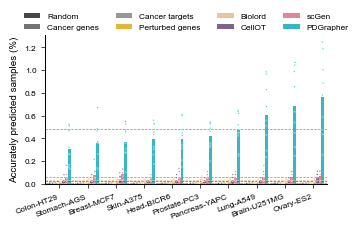

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager
font_dirs = ['/home/gonzag46/.fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  # Output Type 42 (TrueType), editable in Illustrator


# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'GEARS': '#228B22',
    'Perturbed genes': '#FFC000'
    
    
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=1, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    # plt.ylim(0,5)

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.92, bottom = 0.2)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Accurately predicted samples (%)')
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




In [49]:
df = df_mean
metric = 'percentage of samples with partially accurate predictions'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df.sort_values(by = 'Difference', ascending = False)

,Cell Line,Method_SecondBest,percentage of samples with partially accurate predictions_PDGrapher,percentage of samples with partially accurate predictions_SecondBest,Difference
4,Ovary-ES2,scGen,0.762049,0.069939,0.692110
8,Brain-U251MG,scGen,0.682967,0.059866,0.623101
1,Lung-A549,scGen,0.609267,0.056888,0.552379
9,Pancreas-YAPC,scGen,0.471815,0.047906,0.423910
7,Prostate-PC3,scGen,0.419758,0.062893,0.356865
0,Skin-A375,scGen,0.395621,0.047931,0.347689
3,Head-BICR6,scGen,0.396543,0.053894,0.342649
6,Breast-MCF7,scGen,0.369298,0.082704,0.286594
2,Stomach-AGS,scGen,0.360727,0.080819,0.279908
5,Colon-HT29,scGen,0.309649,0.053967,0.255683


## nDCG

/tmp/ipykernel_580393/2588580984.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


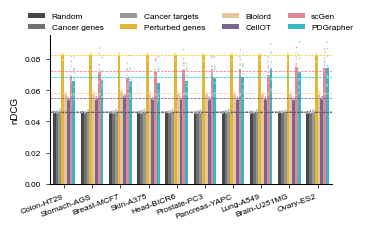

In [50]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'nDCG'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']



with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=1, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.92, bottom = 0.2)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('nDCG')
    plt.savefig(osp.join(outdir, 'panel_ndcg.pdf'))
    plt.show()


In [51]:
df = df_mean
metric = 'nDCG'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df.sort_values(by = 'Difference', ascending = False)




,Cell Line,Method_SecondBest,nDCG_PDGrapher,nDCG_SecondBest,Difference
4,Ovary-ES2,Perturbed genes,0.074169,0.082741,-0.008572
1,Lung-A549,Perturbed genes,0.073812,0.082920,-0.009108
8,Brain-U251MG,Perturbed genes,0.071484,0.083038,-0.011554
9,Pancreas-YAPC,Perturbed genes,0.068666,0.082970,-0.014304
7,Prostate-PC3,Perturbed genes,0.067770,0.082810,-0.015040
2,Stomach-AGS,Perturbed genes,0.066881,0.082989,-0.016108
5,Colon-HT29,Perturbed genes,0.066222,0.082967,-0.016745
3,Head-BICR6,Perturbed genes,0.066031,0.082831,-0.016801
6,Breast-MCF7,Perturbed genes,0.065835,0.083362,-0.017526
0,Skin-A375,Perturbed genes,0.064900,0.082942,-0.018042


## Panel aggregated recall@k

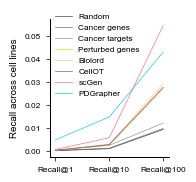

In [52]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the data
data = []

# Iterate over the performance dictionary to extract all recall metrics
for cellline, metrics in performance.items():
    for metric in ['recall@1', 'recall@10', 'recall@100']:
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, metric, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Metric', 'Method', 'Value'])

# Convert the 'Value' column to numeric to avoid any conversion issues
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate the mean for each method and metric across all cell lines
df_mean = df.groupby(['Metric', 'Method'])['Value'].mean().reset_index()




df_mean['Metric'] = [e.capitalize() for e in df_mean['Metric']]
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))

    # Create a line plot for each method showing the mean across all cell lines
    sns.lineplot(data=df_mean, x='Metric', y='Value', hue='Method', palette=palette, hue_order=method_order, markers=True, dashes=False, alpha=0.9)

    # Remove X-axis label
    plt.xlabel('')

    sns.despine()

    # Adjust legend to place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles =  handles[:len(method_order)]
    line_labels = labels[:len(method_order)]
    plt.legend(line_handles, line_labels, bbox_to_anchor=(0.4, 1.1), loc='upper center', ncol=1, frameon=False, title=None)
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.23)
    # plt.subplots_adjust(right=0.92)
    # plt.xticks(rotation=20, ha="right")
    plt.ylabel('Recall across cell lines')
    plt.savefig(osp.join(outdir, 'aggregated_mean_recall_metrics.pdf'))
    plt.show()


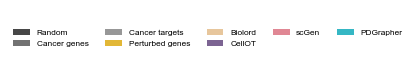

In [53]:
# Create a separate figure for the legend
with sns.plotting_context(plotting_context):
    fig_legend = plt.figure(figsize=(3.543, 0.73))  # Adjust size for the legend
    ax_legend = fig_legend.add_subplot(111)

    # Remove axis for the legend figure
    ax_legend.axis('off')

    # Create the legend using the handles and labels from the original plot
    legend = ax_legend.legend(bar_handles, bar_labels, loc='center', ncol=5, frameon=False, title=None)

    # Save the legend figure
    plt.savefig(osp.join(outdir, 'legend_only.pdf'), bbox_inches=None, pad_inches=0)

    # Show the legend-only figure
    plt.show()

## Panel all metrics ranking

/tmp/ipykernel_580393/451692241.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)


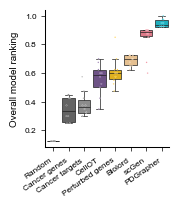

In [54]:
df = pd.read_csv(osp.join(base_path, 'v2/rank_table_genetic_cross_v2.csv'))
df = df.groupby(['Methods', 'Cellline']).mean().reset_index()

# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'BL Rand Pert Genes': 'Perturbed genes',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen'
})

df['rank'] = df['rank']/len(df.Methods.unique())

import matplotlib.pyplot as plt
import seaborn as sns

# Order of methods
# method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'CellOT', 'Biolord', 'scGen', 'PDGrapher']
# Calculate the mean rank for each method
mean_rank = df.groupby('Methods')['rank'].mean().reset_index()

# Sort the methods based on mean rank
method_order = mean_rank.sort_values('rank')['Methods'].tolist()


with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))
    # Create the box plot with method order and custom palette
    sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)

    # Add individual data points with matching colors
    sns.stripplot(x='Methods', y='rank', data=df, hue='Methods', alpha=0.8, hue_order=method_order, palette=palette, edgecolor="white", linewidth=0.2, size=1, jitter=0.15)

    # Remove the legend for the stripplot
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.title('')
    plt.ylabel('Overall model ranking')
    plt.xlabel('')
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.2)
    plt.xticks(rotation=35, ha="right")
    sns.despine()
    
    plt.savefig(osp.join(outdir, 'panel_all_metrics_ranking.pdf'))
    plt.show()



In [55]:
#Append ranking values to Excel file of source dat

df = pd.read_csv(osp.join(base_path, 'v2/rank_table_genetic_cross_v2.csv'))
# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'BL Rand Pert Genes': 'Perturbed genes',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen'
})

df = df.groupby(['Methods', 'Cellline'])['rank'].mean().reset_index()
df.rename(columns={'Methods': 'Model', 'Cellline': 'Cell line', 'rank':'Rank'}, inplace=True)

df = df[['Cell line', 'Model', 'Rank']]


# Load the existing Excel file and append a new sheet
with pd.ExcelWriter(osp.join(outdir, "PDGrapher_Supp_genetic_cross.xlsx"), mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name="Panel D", index=False)
    
    

In [56]:
df

,Cell line,Model,Rank
0,A375,Biolord,5.2
1,A549,Biolord,5.8
2,AGS,Biolord,5.8
3,BICR6,Biolord,5.8
4,ES2,Biolord,5.2
...,...,...,...
75,HT29,scGen,7.2
76,MCF7,scGen,5.4
77,PC3,scGen,4.8
78,U251MG,scGen,7.0
